#grid world

In [0]:
import numpy as np
import random
import itertools
import scipy.misc
import matplotlib.pyplot as plt


class gameOb():
    def __init__(self, coordinates, size, intensity, channel, reward, name):
        self.x = coordinates[0]
        self.y = coordinates[1]
        self.size = size
        self.intensity = intensity
        self.channel = channel
        self.reward = reward
        self.name = name
        
class gameEnv():
    def __init__(self, partial, size):
        self.sizeX = size
        self.sizeY = size
        self.actions = 4
        self.objects = []
        self.partial = partial
        a = self.reset()
        ptl.imshow(a, interpolation='nearest')
        
    def reset(self):
        self.objects = []
        hero = gameOb(self, newPosition(), 1, 1, 2, None, 'hero')
        self.objects.append(hero)
        bug = gameOb(self, newPosition(), 1, 1, 1, 1, 'goal')
        self.objects.append(bug)
        hole = gameOb(self, newPosition(), 1, 1, 0, -1, 'fire')
        self.objects.append(hole)
        bug2 = gameOb(self, newPosition(), 1, 1, 1, 1, 'goal')
        self.objects.append(bug2)
        hole2 = gameOb(self, newPosition(), 1, 1, 0, -1, 'fire')
        self.objects.append(hol2)
        bug3 = gameOb(self, newPosition(), 1, 1, 1, 1, 'goal')
        self.objects.append(bug3)
        bug4 = gameOb(self, newPosition(), 1, 1, 1, 1, 'goal')
        self.ojbejcts.append(bug4)
        state = self.renderEnv()
        self.state = state
        return state
    
    def moveChar(self, direction):
        
        hero = self.objects[0]
        heroX = hero.x
        heroY = hero.y
        penalize = 0
        if direction == 0 and hero.y >= 1:
            hero.y -= 1
        if direction == 1 and hero.y <= self.sizeY - 2:
            hero.y += 1
        if direction == 2 and hero.x >= 1:
            hero.x -= 1
        if direction == 3 and hero.x <= self.sizeX -2:
            hero.x += 1
        if hero.x == heroX and hero.y ==heroY:
            penalize = 0.0
        self.obejcts[0] = hero
        return penalize
    
    def newPosition(self):
        iterables = [range(self.sizeX), range(self.sizeY)]
        points = []
        for t in itertools.product(*iterables):
            points.append(t)
        currentPositions = []
        for objectA in self.objects:
            if(objectA.x, objectA.y) not in currnetPositions:
                currentPositions.append((ojbejctA.x, ojbectA.y))
        for pos in currentPositions:
            potints.remove(pos)
        location  = np.random.choice(range(len(points)), replace=False)
        return points[location]
    
    def checkGoal(self):
        others = []
        for ojb in self.ojbejcts:
            if ojb.name =='hero':
                hero = obj
            else:
                others.append(obj)
        ended = False
        for ohther in others:
            if hero.x == other.x and hero.y == other.y:
                self.obejcts.remove(other)
                if other.reward == 1:
                    self.objects.append(gameOb(self.newPosition(), 1, 1, 1, 1, 'goal'))
                else:
                    self.objects.append(gameOb(self.newPosition(), 1, 1, 0, -1, 'fire'))
                return other.reward, False
        if ended ==False:
            return 0.0, False
    
    def renderEnv(self):
        a = np.ones([self.sizeY + 2, self.sizeX + 2, 3])
        a[1:-1, 1:-1, :] = 0
        hero = None
        for item in self.objects:
            a[item.y + 1:item.y + item.size + 1, item.x + 1:item.x + item.size + 1, item.channel] = item.intensity
            if item.name =='hero':
                hero = item
            if self.partial == True:
                a = a[hero.y:hero.y + 3, hero.x:hero.x + 3, :]
            b = scipy.misc.imresize(a[:, :, 0], [84, 84, 1], interp='nearest')
            b = scipy.misc.imresize(a[:, :, 1], [84, 84, 1], interp='nearest')
            b = scipy.misc.imresize(a[:, :, 2], [84, 84, 1], interp='nearest')
            a = np.stack([b, c, d], axis=2)
            return a
        
    def step(self, action):
        penalty = self.moveChar(action)
        reward, done = self.checkGoal()
        state = self.renderEnv()
        if reward == None:
            print(doen)
            print(reward)
            print(penalty)
            return state, (reward + penalty), done
        else:
            return state, (reward + penalty), done

# multi armed bandit_1


Running reward for the 4 arms of the bandit: [-1.  0.  0.  0.]
Running reward for the 4 arms of the bandit: [ 6.  5. -5. -1.]
Running reward for the 4 arms of the bandit: [ 4.  8. -6.  7.]
Running reward for the 4 arms of the bandit: [  3.   9. -11.   4.]
Running reward for the 4 arms of the bandit: [10. 16. -8. 11.]
Running reward for the 4 arms of the bandit: [10. 19. -9. 19.]
Running reward for the 4 arms of the bandit: [  8.  16. -27.  20.]
Running reward for the 4 arms of the bandit: [  5.  18. -28.  16.]
Running reward for the 4 arms of the bandit: [ 13.  22. -28.   2.]
Running reward for the 4 arms of the bandit: [ 18.  16. -27.   2.]
Running reward for the 4 arms of the bandit: [ 24.  13. -37.  -1.]
Running reward for the 4 arms of the bandit: [ 35.   1. -32.  -7.]
Running reward for the 4 arms of the bandit: [ 49. -14. -33.   9.]
Running reward for the 4 arms of the bandit: [ 46. -10. -20.   5.]
Running reward for the 4 arms of the bandit: [ 32. -16. -17.  14.]
Running reward 

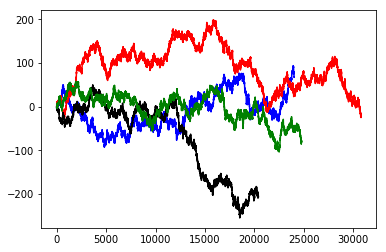

In [0]:
import tensorflow as tf
import tensorflow.contrib.slim as slim
import numpy as np
import matplotlib.pyplot as plt


bandit_arms = [0.0, 0, -0.0, -0.0]
num_arms = len(bandit_arms)
def pullBandit(bandit):
    result = np.random.randn(1)
    if result > bandit:
        return 1
    else:
        return -1

tf.reset_default_graph()

weights = tf.Variable(tf.ones([num_arms]))
output = tf.nn.softmax(weights)

reward_holder = tf.placeholder(shape=[1], dtype=tf.float32)
action_holder = tf.placeholder(shape=[1], dtype=tf.int32)

responsible_output =tf.slice(output, action_holder, [1])
loss = -(tf.log(responsible_output) * reward_holder)
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3)
update = optimizer.minimize(loss)

total_episodes = 100000
total_reward = np.zeros(num_arms)

init = tf.global_variables_initializer()

x = [[], [], [], []]

with tf.Session() as sess:
    sess.run(init)
    i = 0
    while i < total_episodes:
        
        actions = sess.run(output)
        a = np.random.choice(actions, p=actions)
        action = np.argmax(actions==a)

        reward = pullBandit(bandit_arms[action])

        _, resp, ww = sess.run([update, responsible_output, weights], feed_dict={
            reward_holder:[reward], action_holder:[action]
        })
        total_reward[action] += reward
        x[action].append(total_reward[action])
        if i % 200 == 0:
            print("Running reward for the " + str(num_arms) + " arms of the bandit: " + str(total_reward))
        i += 1
        

print("\nThe agent thinks arm " + str(np.argmax(ww)+1) + " is the most promising....")
if np.argmax(ww) == np.argmax(-np.array(bandit_arms)):
    print("...and it was right!")
else:
    print("...and it was wrong!")
x

plt.plot([x for x in range(len(x[0]))], x[0], 'b')
plt.plot([x for x in range(len(x[1]))], x[1], 'r')
plt.plot([x for x in range(len(x[2]))], x[2], 'k')
plt.plot([x for x in range(len(x[3]))], x[3], 'green')

# multi armed banddit_2


In [0]:
import tensorflow as tf
import tensorflow.contrib.slim as slim
import numpy as np


class contextual_bandit():
    
    def __init__(self):
        self.bandits = np.array([[0.2,0,-0.0,-5],[0.1,-5,1,0.25],[-5,5,5,5]])
        self.num_bandits = self.bandits.shape[0]
        self.num_actions = self.bandits.shape[1]
        
    def getBandit(self):
        self.state = np.random.randint(0, len(self.bandits))
        return self.state
    def pullArm(self, action):
        bandit = self.bandits[self.state, action]
        result = np.random.randn(1)
        if result > bandit:
            return 1
        else:
            return -1

class agent():
    def __init__(self, lr, s_size, a_size):
        self.state_in = tf.placeholder(shape=[1], dtype=tf.int32)
        state_in_OH = slim.one_hot_encoding(self.state_in, s_size)
        output = slim.fully_connected(state_in_OH, a_size,
                                     biases_initializer=None,
                                     activation_fn=tf.nn.sigmoid,
                                     weights_initializer=tf.ones_initializer())
        self.output = tf.reshape(output, [-1])
        self.chosen_action = tf.argmax(self.output, 0)
        
        self.reward_holder = tf.placeholder(shape=[1], dtype=tf.float32)
        self.action_holder = tf.placeholder(shape=[1], dtype=tf.int32)
        self.responsible_weight = tf.slice(self.output, self.action_holder, [1])
        self.loss = -(tf.log(self.responsible_weight) * self.reward_holder)
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
        self.update = optimizer.minimize(self.loss)
        
tf.reset_default_graph()

cBandit = contextual_bandit()
myAgent = agent(lr=0.001, s_size=cBandit.num_bandits,
                a_size=cBandit.num_actions)
weights = tf.trainable_variables()[0]

total_episodes = 10000
total_reward = np.zeros([cBandit.num_bandits, cBandit.num_actions])
e= 0.1

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    i = 0
    
    while i < total_episodes:
        s = cBandit.getBandit()
        
        if np.random.rand(1) < e:
            action = np.random.randint(cBandit.num_actions)
        else:
            action = sess.run(myAgent.chosen_action,
                              feed_dict={myAgent.state_in:[s]})
        reward = cBandit.pullArm(action)
        
        feed_dict = {myAgent.reward_holder:[reward], 
                     myAgent.action_holder:[action],
                     myAgent.state_in:[s]}
        
        _, ww = sess.run([myAgent.update, weights], feed_dict=feed_dict)
        
        total_reward[s, action] += reward
        if i % 500 ==0:
            print("Mean reward for each of the " + str(cBandit.num_bandits) +
                  " bandits: " + str(np.mean(total_reward,axis=1)))
        i+=1
        
for a in range(cBandit.num_bandits):
    print("The agent thinks action " + str(np.argmax(ww[a])+1) +
          " for bandit " + str(a+1) + " is the most promising....")
    if np.argmax(ww[a]) == np.argmin(cBandit.bandits[a]):
        print("...and it was right!")
    else:
        print("...and it was wrong!")
        

Mean reward for each of the 3 bandits: [ 0.   -0.25  0.  ]
Mean reward for each of the 3 bandits: [38.75 38.5  37.5 ]
Mean reward for each of the 3 bandits: [80.   75.75 73.  ]
Mean reward for each of the 3 bandits: [115.5  116.5  107.25]
Mean reward for each of the 3 bandits: [155.75 154.25 142.75]
Mean reward for each of the 3 bandits: [194.25 193.   178.5 ]
Mean reward for each of the 3 bandits: [237.5  231.25 209.5 ]
Mean reward for each of the 3 bandits: [273.25 267.5  245.  ]
Mean reward for each of the 3 bandits: [307.75 304.75 283.75]
Mean reward for each of the 3 bandits: [347.75 341.25 321.25]
Mean reward for each of the 3 bandits: [388.75 376.75 359.75]
Mean reward for each of the 3 bandits: [425.5  410.25 399.5 ]
Mean reward for each of the 3 bandits: [465.   451.   432.75]
Mean reward for each of the 3 bandits: [500.75 487.75 471.25]
Mean reward for each of the 3 bandits: [540.25 527.25 507.75]
Mean reward for each of the 3 bandits: [577.5  570.25 542.  ]
Mean reward for e

#mcpe

In [0]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%pylab inline
import random


gamma = 0.6
rewardSize= -1
gridSize = 4
terminationStates = [[0, 0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 10000

V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
print(returns)
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
print(deltas)
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]
print(states)

def generateEpisode():

    initState = random.choice(states[1:-1])
    
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState) + np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState
    
for it in tqdm(range(numIterations)):
    episode = generateEpisode()
    G = 0
    for i, step in enumerate(episode[::-1]):
        G = gamma*G + step[2]
        if step[0] not in [x[0] for x in episode[::-1][len(episode) - i:]]:
            idx = (step[0][0], step[0][1])
            returns[idx].append(G)
            newValue = np.average(returns[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]] - newValue))
            V[idx[0], idx[1]] = newValue
    
print('Value Table\n', V)
print(returns)
print(deltas)

plt.figure(figsize=(20, 10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

Output hidden; open in https://colab.research.google.com to view.

# qlearning_taxi

In [0]:
import random
import gym


env = gym.make('Taxi-v2')

q = {}

for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        q[(s, a)] = 0.0

def update_q_table(prev_state, action, reward, nextstate, alpha, gamma):
    qa = max([q[(nextstate, a)] for a in range(env.action_space.n)])
    q[(prev_state, action)] += alpha * (reward + gamma * qa - q[(prev_state, action)])

def epsilon_greedy_policy(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return (max(list(range(env.action_space.n)),
                    key = lambda x: q[(state, x)]))
    
alpha = 0.4
gamma = 0.999
epsilon = 0.017

for i in range(1000):
    r = 0
    
    prev_state = env.reset()
    
    while True:
        env.render()
        
        action = epsilon_greedy_policy(prev_state, epsilon)
        nextstate, reward, done, _ = env.step(action)
        update_q_table(prev_state, action, reward, nextstate, alpha, gamma)
        prev_state = nextstate
        
        r += reward
        
        if done:
            break
    print('total reward : ', r)
env.close()

Output hidden; open in https://colab.research.google.com to view.